In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import os

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df=pd.read_csv('/kaggle/input/movie-data/movie_data_full_final.csv')

In [3]:
df.dtypes

Title                 object
Year                   int64
Runtime (Minutes)      int64
Genre                 object
IMDB                 float64
Metascore            float64
Description           object
Director              object
Stars                 object
Votes                  int64
Gross ($)              int64
dtype: object

In [4]:
df.isnull().sum()

Title                0
Year                 0
Runtime (Minutes)    0
Genre                0
IMDB                 0
Metascore            0
Description          0
Director             0
Stars                0
Votes                0
Gross ($)            0
dtype: int64

In [5]:
df.duplicated().sum()

0

In [6]:
df.head()

,Title,Year,Runtime (Minutes),Genre,IMDB,Metascore,Description,Director,Stars,Votes,Gross ($)
0,Star Wars: Episode VII - The Force Awakens,2015,138,"Action, Adventure, Sci-Fi",7.8,80.0,"As a new threat to the galaxy rises, Rey, a de...",J.J. Abrams,"Daisy Ridley,John Boyega,Oscar Isaac,Domhnall ...",954497,936662225
1,Avengers: Endgame,2019,181,"Action, Adventure, Drama",8.4,78.0,After the devastating events of Avengers: Infi...,"Anthony Russo, Joe Russo","Robert Downey Jr.,Chris Evans,Mark Ruffalo,Chr...",1207434,858373000
2,Spider-Man: No Way Home,2021,148,"Action, Adventure, Fantasy",8.2,71.0,"With Spider-Man's identity now revealed, Peter...",Jon Watts,"Tom Holland,Zendaya,Benedict Cumberbatch,Jacob...",824858,804747988
3,Avatar,2009,162,"Action, Adventure, Fantasy",7.9,83.0,A paraplegic Marine dispatched to the moon Pan...,James Cameron,"Sam Worthington,Zoe Saldana,Sigourney Weaver,M...",1358149,760507625
4,Top Gun: Maverick,2022,130,"Action, Drama",8.3,78.0,"After thirty years, Maverick is still pushing ...",Joseph Kosinski,"Tom Cruise,Jennifer Connelly,Miles Teller,Val ...",623686,718732821


In [7]:
df = df.sample(frac=1, random_state=11)

In [8]:
df.head()

,Title,Year,Runtime (Minutes),Genre,IMDB,Metascore,Description,Director,Stars,Votes,Gross ($)
5770,Titus,1999,162,"Drama, History, Thriller",7.1,57.0,"Titus returns victorious from war, only to pla...",Julie Taymor,"Anthony Hopkins,Jessica Lange,Osheen Jones,Dar...",21133,1921350
6017,Lady Macbeth,2016,89,"Drama, Romance",6.8,76.0,"In 19th-century rural England, a young bride w...",William Oldroyd,"Florence Pugh,Cosmo Jarvis,Paul Hilton,Naomi A...",25616,1129408
7144,It's a Disaster,2012,88,"Comedy, Drama",6.4,57.0,"Four couples meet for Sunday brunch, then disc...",Todd Berger,"Rachel Boston,Laura Adkin,Kevin M. Brennan,Dav...",11446,38100
7179,Last Life in the Universe,2003,112,"Comedy, Drama, Romance",7.5,73.0,"A suicidal, obsessively compulsive Japanese li...",Pen-Ek Ratanaruang,"Tadanobu Asano,Sinitta Boonyasak,Takashi Miike...",11411,31747
7076,The Boss of It All,2006,99,Comedy,6.6,71.0,An IT company hires an actor to serve as the c...,Lars von Trier,"Jens Albinus,Peter Gantzler,Friðrik Þór Friðri...",12227,51300


In [9]:
df.reset_index(drop=True, inplace=True)
df.head()

,Title,Year,Runtime (Minutes),Genre,IMDB,Metascore,Description,Director,Stars,Votes,Gross ($)
0,Titus,1999,162,"Drama, History, Thriller",7.1,57.0,"Titus returns victorious from war, only to pla...",Julie Taymor,"Anthony Hopkins,Jessica Lange,Osheen Jones,Dar...",21133,1921350
1,Lady Macbeth,2016,89,"Drama, Romance",6.8,76.0,"In 19th-century rural England, a young bride w...",William Oldroyd,"Florence Pugh,Cosmo Jarvis,Paul Hilton,Naomi A...",25616,1129408
2,It's a Disaster,2012,88,"Comedy, Drama",6.4,57.0,"Four couples meet for Sunday brunch, then disc...",Todd Berger,"Rachel Boston,Laura Adkin,Kevin M. Brennan,Dav...",11446,38100
3,Last Life in the Universe,2003,112,"Comedy, Drama, Romance",7.5,73.0,"A suicidal, obsessively compulsive Japanese li...",Pen-Ek Ratanaruang,"Tadanobu Asano,Sinitta Boonyasak,Takashi Miike...",11411,31747
4,The Boss of It All,2006,99,Comedy,6.6,71.0,An IT company hires an actor to serve as the c...,Lars von Trier,"Jens Albinus,Peter Gantzler,Friðrik Þór Friðri...",12227,51300


/tmp/ipykernel_23/1578005850.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix=df.corr()


Text(0.5, 1.0, 'Correlation Matrix')

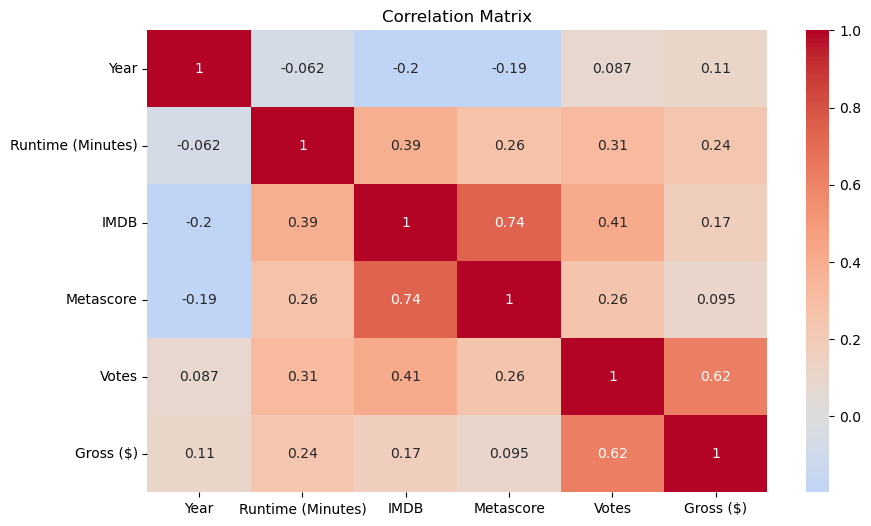

In [10]:
correlation_matrix=df.corr()
fig=plt.figure(figsize=(10,6))
sns.heatmap(correlation_matrix, center=0, cmap='coolwarm', annot=True)
plt.title('Correlation Matrix')

In [11]:
df.columns

Index(['Title', 'Year', 'Runtime (Minutes)', 'Genre', 'IMDB', 'Metascore',
       'Description', 'Director', 'Stars', 'Votes', 'Gross ($)'],
      dtype='object')

In [12]:
df.describe()

,Year,Runtime (Minutes),IMDB,Metascore,Votes,Gross ($)
count,7484.000000,7484.000000,7484.000000,7484.000000,7.484000e+03,7.484000e+03
mean,2001.169294,108.032469,6.475227,56.014431,1.079655e+05,3.924894e+07
std,14.764599,18.625935,0.935469,17.767322,1.918049e+05,6.614114e+07
min,1916.000000,63.000000,1.300000,1.000000,5.005000e+03,1.450000e+02
25%,1994.000000,95.000000,5.900000,44.000000,1.557500e+04,2.491459e+06
50%,2005.000000,105.000000,6.500000,56.000000,4.099950e+04,1.662513e+07
75%,2012.000000,117.000000,7.100000,69.000000,1.132320e+05,4.698697e+07
max,2022.000000,366.000000,9.300000,100.000000,2.787706e+06,9.366622e+08


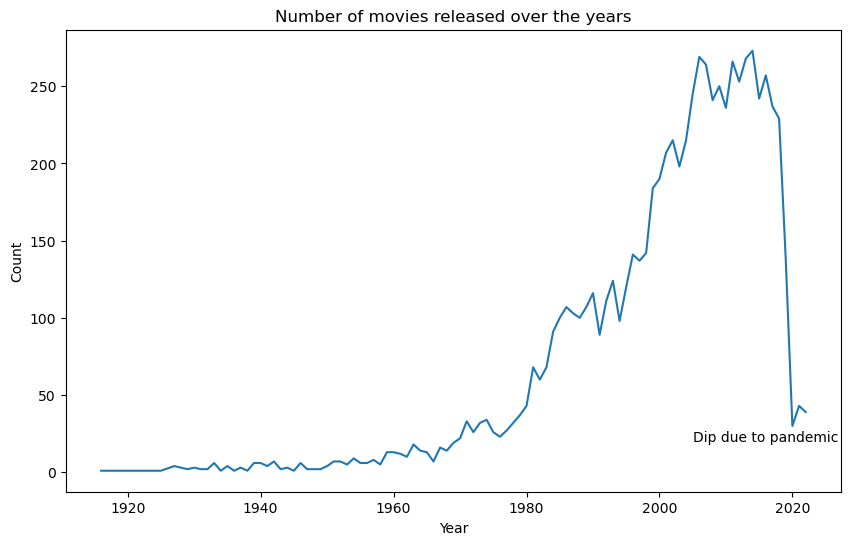

In [13]:
fig=plt.figure(figsize=(10,6))
sns.lineplot(x='Year',  y='Title', data=df.groupby('Year').count().reset_index())
plt.title('Number of movies released over the years')
plt.xlabel('Year')
plt.ylabel('Count')
plt.annotate('Dip due to pandemic', xy=(2016,20), ha='center')
plt.show()

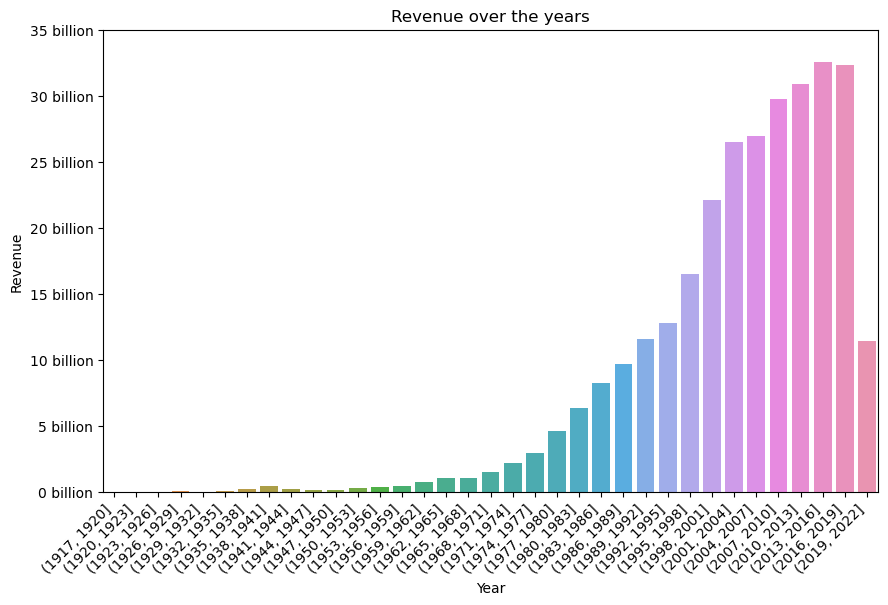

In [14]:
fig=plt.figure(figsize=(10,6))
sns.barplot(x='Year',  y='Gross ($)', data=df.groupby(pd.cut(df['Year'], bins=range(1917,2023,3)))['Gross ($)'].sum().reset_index())
plt.title('Revenue over the years')
plt.xlabel('Year')
plt.ylabel('Revenue')
plt.xticks(rotation=45, ha='right')
y_ticks=np.arange(0,40,5)*1e9
y_labels=[f"{i*1e-9:.0f} billion" for i in y_ticks] 
plt.yticks(y_ticks, y_labels)
plt.show()

Text(0.5, 0, 'Votes')

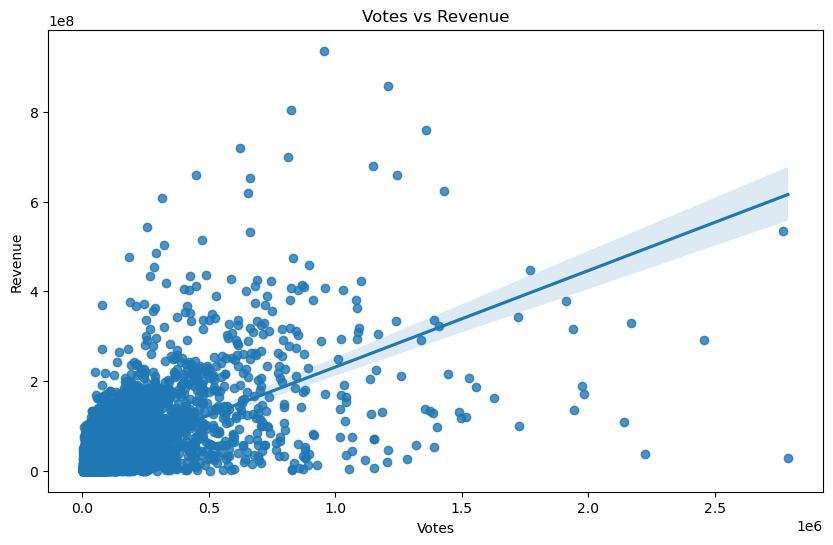

In [15]:
fig=plt.figure(figsize=(10,6))
sns.regplot(data=df, x='Votes', y='Gross ($)')
plt.title('Votes vs Revenue')
plt.ylabel('Revenue')
plt.xlabel('Votes')

<Figure size 1000x800 with 0 Axes>

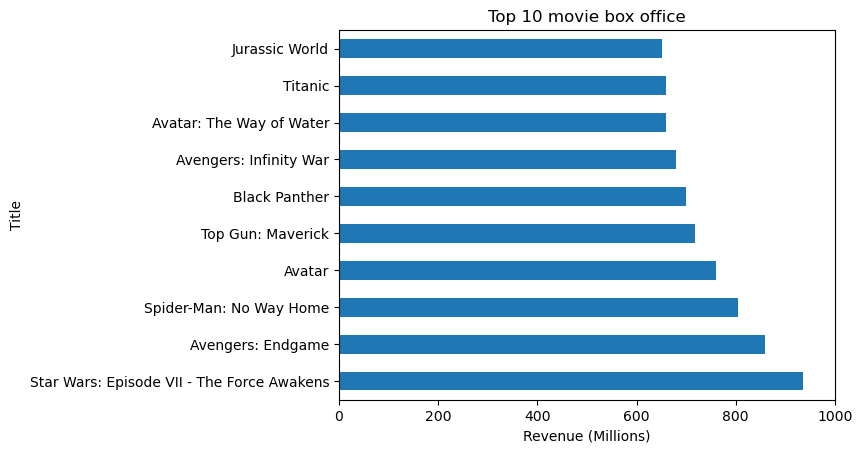

In [16]:
top10_movies=df.sort_values(ascending=False,by='Gross ($)')[0:10]
fig=plt.figure(figsize=(10,8))
top10_movies.plot.barh(y='Gross ($)', x='Title')
plt.ylabel('Title')
plt.xlabel('Revenue (Millions)')
plt.title('Top 10 movie box office')
y_ticks=np.arange(0,11,2)*1e8
labels=[f"{i*1e-6:.0f}" for i in y_ticks]
plt.xticks(y_ticks,labels)
plt.legend('',frameon=False)

<Figure size 1000x800 with 0 Axes>

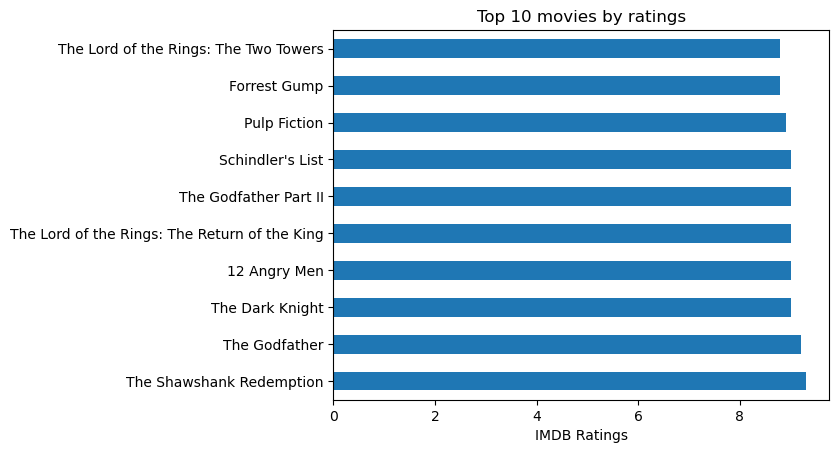

In [17]:
top10=df.sort_values(ascending=False, by='IMDB')[0:10]
plt.figure(figsize=(10,8))
top10.plot.barh(x='Title', y='IMDB')
plt.xlabel('IMDB Ratings')
plt.ylabel('')
plt.title('Top 10 movies by ratings')
plt.legend('',frameon=False)
plt.show()


In [18]:
fig=px.line(df.groupby('Year').count().reset_index(), x='Year', y='Title')
fig.update_layout(xaxis_title='Year',
                 yaxis_title='Count',
                 title=dict(x=0.5, y=0.95, text='Number of movies released over the year'))
fig.add_annotation(x=2020, y=30, text='Dip due to pandemic', showarrow=True, arrowhead=2,ay=20)

In [19]:
data=df.groupby(pd.cut(df['Year'], bins=range(1935,2023,3)).astype(str)).agg({'Gross ($)':'sum', 'Title':'count'}).reset_index()
data=data.iloc[:-1]
fig=px.bar(data, x='Year', y='Gross ($)', color='Title')
fig.update_layout(xaxis_title='Year Interval',
                 yaxis_title='Revenue (Billions)',
                 title=dict(x=0.5,y=0.95, text='Revenue over the years'),
                 coloraxis_colorbar_title='Number of Movies')

In [20]:
top10_movies=df.sort_values(ascending=False,by='Gross ($)')[0:10]
fig=px.bar(top10_movies, y='Title', x='Gross ($)', title='Top 10 movie box office', color='Votes',color_continuous_scale='Plasma')
fig.update_layout(xaxis_title='Revenue (Millions)',
                  yaxis_title='',
                  title=dict(x=0.6, y=0.9, text='Top 10 movie box office'),
                  width=1200,
                  height=700
                    )
y_ticks=np.arange(0,11,2)*1e8
labels=[f"{i*1e-6:.0f}" for i in y_ticks]
fig.update_xaxes(tickvals=y_ticks,
                  ticktext=labels,
                  showgrid=False)

In [21]:
top10=df.sort_values(ascending=False, by='IMDB')[0:10]
fig=px.bar(top10, y='Title', x='IMDB', title='Top 10 movies by ratings', color='Metascore', color_continuous_scale='Plasma')
fig.update_layout(xaxis_title='IMDB Ratings',
                  yaxis_title='',
                  title=dict(x=0.6, y=0.9, text='Top 10 movies by ratings'),
                  width=1200,
                  height=700
                    )
fig.update_xaxes(showgrid=False)

In [22]:
genres=', '.join(df['Genre'])
unique_genres=set(genres.split(', '))
genre_counts={genre:0 for genre in unique_genres}
for genre in unique_genres:
    genre_counts[genre]=genres.split(', ').count(genre)
genre_counts=dict(sorted(genre_counts.items(), key=lambda item: item[1], reverse=True))

In [23]:
fig = px.bar(x=genre_counts.keys(), y=genre_counts.values(), title='Movie Genre Distribution', labels={'x':'Genre', 'y':'Movie Count'})
fig.update_layout(title=dict(x=0.5,y=0.9))
fig.show()

In [24]:
directors=', '.join(df['Director'])
unique_directors=set(directors.split(', '))
director_counts={director:0 for director in unique_directors}
for director in director_counts:
    director_counts[director]=directors.split(', ').count(director)

In [25]:
director_counts=dict(sorted(director_counts.items(), key=lambda item: item[1], reverse=True))

In [26]:
fig = px.bar(x=list(director_counts.keys())[0:35], y=list(director_counts.values())[0:35], labels={'x': 'Director', 'y': 'Movie Count'}, title='Top 35 Directors')
fig.update_layout(title=dict(x=0.5,y=0.9))
fig.show()

In [27]:
stars=','.join(df['Stars'])
unique_stars=set(stars.split(','))
stars_counts={star:0 for star in unique_stars}
for star in stars_counts:
    stars_counts[star]=stars.split(',').count(star)

In [28]:
stars_counts=dict(sorted(stars_counts.items(), key=lambda item: item[1], reverse=True))

In [29]:
fig= px.bar(x=list(stars_counts.keys())[0:30], y=list(stars_counts.values())[0:30], labels={'x': 'Star', 'y': 'Movie Count'}, title='Top 30 Stars')
fig.update_layout(title=dict(x=0.5,y=0.9))
fig.show()

In [30]:
from wordcloud import WordCloud, STOPWORDS

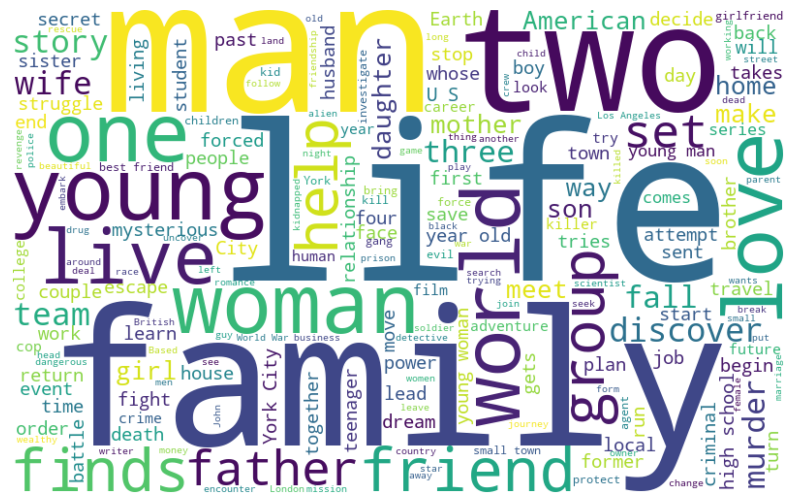

In [31]:
words=['find', 'come', 'take', 'now', 'keep', 'go', 'want', 'goes', 'may', 'new', 'must', 'become', 'becomes', 'use']
stopwords=STOPWORDS.union(words)
wordcloud=WordCloud(width=800,height=500, background_color='white', stopwords=stopwords).generate(' '.join(df['Description']))
plt.figure(figsize=(10,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()